# About this Project

As part of a retail analytics team, I have have been approached by a client, the Category Manager for Chips, who wants to better understand the types of customers who purchase Chips and their purchasing behaviour within the region.

The insights from the analysis will feed into the supermarket’s strategic plan for the chip category in the next half year.

The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.  We have been provided with two datasets for the analysis; transactions.xlsv which contains details of transactions and customers.csv which contains details of customer segments.
The Metrics by which we will be evaluating the customer purchasing behaviour are:
- Total Spend
- Average Spend
- Pack Sizes

In [74]:
pip install pandoc

     |████████████████████████████████| 117 kB 611 kB/s eta 0:00:01
     |████████████████████████████████| 49 kB 2.0 MB/s eta 0:00:011
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33280 sha256=dbee46d0e90a507390e8578e4d381ede7ac86698dc06a590b5ade536da529b13
  Stored in directory: /Users/apple/Library/Caches/pip/wheels/69/e6/a1/1daa96d919c9e09a71473649b717b8da286f3f8d7719d1cfc5
Successfully built pandoc
Note: you may need to restart the kernel to use updated packages.


In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re
sns.set()

In [2]:
transactions=pd.read_excel('QVI_transaction_data.xlsx') #loading the dataset

In [3]:
transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [5]:
transactions.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


# Initial Obervations

There are 8 columns and 264836 rows in the dataset. All the columns names makes sense, like they belong in the data, there are no null values, although the data types of some columns like product name, date will need to be formatted to reflect their values. Also not all the columns are important our analysis, the most relevant ones are the date, Prod_name, Prod_qty, and tot_sales so we will examine those closely next.

# The date column

In [6]:
transactions['DATE'].describe()

count    264836.000000
mean      43464.036260
std         105.389282
min       43282.000000
25%       43373.000000
50%       43464.000000
75%       43555.000000
max       43646.000000
Name: DATE, dtype: float64

The values in the date column are of the integer date type, they need to be converted to the datetime type to enable further analysis with them

In [7]:
transactions['DATE'] = pd.to_datetime(transactions['DATE'],origin ="1899-12-30", unit = 'D')#convert the datetime

In [70]:
transactions['DATE'].describe(datetime_is_numeric=True)

count                           246740
mean     2018-12-30 01:18:58.448569344
min                2018-07-01 00:00:00
25%                2018-09-30 00:00:00
50%                2018-12-30 00:00:00
75%                2019-03-31 00:00:00
max                2019-06-30 00:00:00
Name: DATE, dtype: object

Now our date is in the right format, so we can see that our data contains transactions from 1st of january 2018 to the 30th of June 2019, Next we will try to look at trends in the transactions date.

<AxesSubplot:xlabel='DATE', ylabel='PROD_QTY'>

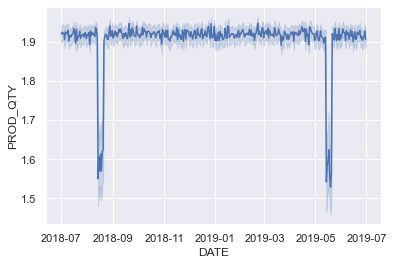

In [44]:
sns.lineplot(data=transactions, x="DATE", y="PROD_QTY")

The line chart for the product quantity in the data set shows that the sum of product purchased throughout the year remains constant except for some very low sales in the months of August and May.

In [71]:
transactions['month'] = transactions['DATE'].dt.month

In [72]:
by_month = transactions.groupby('month').sum()#group transactions by month
by_month

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
month,,,,,,
1,2767576,2770938202,2768230875,1162852,39519,151593.80
2,2576098,2580102813,2578468460,1067273,36541,140480.00
3,2863666,2867348135,2865312983,1196903,40534,155772.80
4,2740739,2744260736,2741408249,1140075,38980,149374.20
5,2813862,2817239093,2814992389,1169767,38257,146300.35
6,2749747,2768391125,2750633084,1136417,39042,150135.90
7,2841287,2855968884,2842871760,1188450,40310,154514.50
8,2807963,2818686455,2810125579,1172784,38481,147422.05
9,2722057,2735993036,2722562612,1145631,39001,150058.90


<AxesSubplot:xlabel='month'>

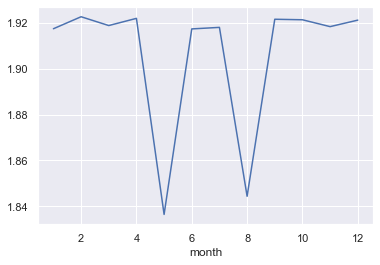

In [46]:
by_month['PROD_QTY'].plot.line()

Grouping the data by month to find trends in monthly sales also confirms the above, generally sales is the same through the months with big dips in the month of May and August. 

# The Product Name Column

In [10]:
transactions['PROD_NAME'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 264836 entries, 0 to 264835
Series name: PROD_NAME
Non-Null Count   Dtype 
--------------   ----- 
264836 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


In [11]:
transactions['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [12]:
transactions['PROD_NAME'] = transactions['PROD_NAME'].astype(str)

In [13]:
transactions['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

We have 114 unique values in our prod_name column, but we need to be sure that they are all chips products, some are quite obvious, they have chips or some variations of the word chips in their names, so we will separate them from the dataframe and examine the rest of the data more closely. Also at this initial glance the most frequently purchased product is Kettle Mozzarella   Basil & Pesto 175g.

In [14]:
Chipwords = ['chip' 'chips', 'chp','chps']

In [15]:
non_chips_df = transactions[~transactions['PROD_NAME'].str.contains('[Cc]h[ip]*s?')]#regex to filter for words that contains the word chips or its variations

In [16]:
non_chips_df['PROD_NAME'].unique()

array(['Old El Paso Salsa   Dip Tomato Mild 300g', 'CCs Original 175g',
       'Burger Rings 220g', 'Smiths Crinkle      Original 330g',
       'Kettle Sea Salt     And Vinegar 175g', 'Kettle Original 175g',
       'Pringles Sweet&Spcy BBQ 134g',
       'Red Rock Deli SR    Salsa & Mzzrlla 150g',
       'Red Rock Deli Sp    Salt & Truffle 150G',
       'Doritos Mexicana    170g',
       'Smiths Crinkle Cut  Tomato Salsa 150g',
       'Kettle Mozzarella   Basil & Pesto 175g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Smiths Crinkle Cut  Salt & Vinegar 170g',
       'Infuzions BBQ Rib   Prawn Crackers 110g',
       'Tyrrells Crisps     Lightly Salted 165g',
       'Doritos Salsa       Medium 300g', 'Kettle 135g Swt Pot Sea Salt',
       'Pringles SourCream  Onion 134g', 'Woolworths Mild     Salsa 300g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Pringles Original   Crisps 134g',
       'Kettle Sensations   BBQ&Maple 150g',
       'Tostitos Lightly    Salte

Now that we have separated the transactions dataframe to separate values that do not have chips in their names, we will examine the column more closely to verify that they are indeed chips products. I did a google search of the names and most of the products are indeed chips but those with Salsa in their names are Salsa products not chips so we will be droping them from the dataframe.

In [17]:
transactions = transactions.drop(transactions[transactions['PROD_NAME'].str.contains('Salsa')].index)

Next we will extract the brand names and the size of the chips from the column. To begin, we will format the column values, some of them contain multiple blank spaces.

In [73]:
new = transactions["PROD_NAME"].str.split("  ", n = 1, expand = True)#dataframe containing only the Prosuct name column to extract the brand names and size.

In [19]:
new

,0,1
0,Natural Chip,Compny SeaSalt175g
1,CCs Nacho Cheese,175g
2,Smiths Crinkle Cut,Chips Chicken 170g
3,Smiths Chip Thinly,S/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,None
...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,None
264832,Tostitos Splash Of,Lime 175g
264833,Doritos Mexicana,170g
264834,Doritos Corn Chip Mexican Jalapeno 150g,None


In [20]:
for col in new.columns:
    new[col] = new[col].str.strip()#to strip the columns of blank spaces

In [21]:
new['PROD_NAME_NEW'] = new[0] + new[1]

In [22]:
new

,0,1,PROD_NAME_NEW
0,Natural Chip,Compny SeaSalt175g,Natural ChipCompny SeaSalt175g
1,CCs Nacho Cheese,175g,CCs Nacho Cheese175g
2,Smiths Crinkle Cut,Chips Chicken 170g,Smiths Crinkle CutChips Chicken 170g
3,Smiths Chip Thinly,S/Cream&Onion 175g,Smiths Chip ThinlyS/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,None,NaN
...,...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,None,NaN
264832,Tostitos Splash Of,Lime 175g,Tostitos Splash OfLime 175g
264833,Doritos Mexicana,170g,Doritos Mexicana170g
264834,Doritos Corn Chip Mexican Jalapeno 150g,None,NaN


In [23]:
new['PROD_NAME_NEW'] = new['PROD_NAME_NEW'].fillna(new[0]) #to fill the Null values in the new product name column with values

Next we will be extracting the brand name and size from the clean Product Name column

In [24]:
new

,0,1,PROD_NAME_NEW
0,Natural Chip,Compny SeaSalt175g,Natural ChipCompny SeaSalt175g
1,CCs Nacho Cheese,175g,CCs Nacho Cheese175g
2,Smiths Crinkle Cut,Chips Chicken 170g,Smiths Crinkle CutChips Chicken 170g
3,Smiths Chip Thinly,S/Cream&Onion 175g,Smiths Chip ThinlyS/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,None,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,None,Kettle Sweet Chilli And Sour Cream 175g
264832,Tostitos Splash Of,Lime 175g,Tostitos Splash OfLime 175g
264833,Doritos Mexicana,170g,Doritos Mexicana170g
264834,Doritos Corn Chip Mexican Jalapeno 150g,None,Doritos Corn Chip Mexican Jalapeno 150g


In [25]:
new['PROD_NAME_NEW'].unique()

array(['Natural ChipCompny SeaSalt175g', 'CCs Nacho Cheese175g',
       'Smiths Crinkle CutChips Chicken 170g',
       'Smiths Chip ThinlyS/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain WavesSweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves SourCream&Chives 210G',
       'Kettle SensationsSiracha Lime 150g', 'Twisties Cheese270g',
       'WW Crinkle CutChicken 175g', 'Thins Chips Light&Tangy 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream &Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths CrinkleOriginal 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea SaltAnd Vinegar 175g',
       'Smiths Chip ThinlyCut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli ThaiChilli&Lime 150g',
       'Pringles Sthrn FriedChicken 134g', 'Pringles 

Next, We can see that there are some inconsistencies with the names of some brands, alot of the brands name appear in different spellings in the dataset, for instance Red Rock Deli apperaed as Red Dock DEli and RRD in different places if we attempt to extract brand names at this points, we will have many brands repeating themselves in different spellings so we will be cleaning them next.

In [26]:
new['PROD_NAME_NEW'] = new['PROD_NAME_NEW'].replace(['Natural ChipCompny SeaSalt175g', 'Grain WavesSweet Chilli 210g', 'Grain Waves SourCream&Chives 210G', 'WW Crinkle CutChicken 175g','NCC Sour Cream &Garden Chives 175g','Infzns Crn Crnchers Tangy Gcamole 110g','Red Rock Deli ThaiChilli&Lime 150g','Red Rock Deli SpSalt & Truffle 150G','Natural ChipCoHony Soy Chckn175g','Dorito Corn ChpSupreme 380g','Smith Crinkle CutMac N Cheese 150g','GrnWves Plus Btroot & Chilli Jam 180g','Natural Chip CoTmato Hrb&Spce 175g','French Fries Potato Chips 175g','RRD Chilli&Coconut 150g','WW Original CornChips 200g','WW D/Style ChipSea Salt 200g','WW Original Stacked Chips 160g','RRD Sweet Chilli &Sour Cream 165g','WoolWorths Crinkle CutOriginal 175g','WW Supreme CheeseCorn Chips 200g','Snbts Whlgrn Crisps Cheddr&Mstrd 90g','RRD Steak &Chimuchurri 150g','RRD Honey SoyChicken 165g','RRD Salt & Vinegar165g','WW Sour Cream &OnionStacked Chips 160g','RRD Lime & Pepper165g','Natural ChipCo SeaSalt & Vinegr 175g','Red Rock Deli Chikn&Garlic Aioli 150g','RRD SR Slow RstPork Belly 150g', 'RRD Pc Sea Salt165g','Smith Crinkle CutBolognese 150g','WW Crinkle CutOriginal 175g','Woolworths CheeseRings 190g'], ['NaturalChipCompany SeaSalt 175g', 'GrainWaves Sweet Chilli 210g','GrainWaves SourCream&Chives 210G','WoolWorths Crinkle CutChicken 175g','NaturalChipCompany Sour Cream &Garden Chives 175g','Infuzions Corn Crunchers Tangy Guacamole 110g','RedRockDeli ThaiChilli&Lime 150g','RedRockDeli SpSalt & Truffle 150G','NaturalChipCompany Hony Soy Chckn175g','Doritos Corn ChpSupreme 380g','Smiths Crinkle CutMac N Cheese 150g','GrainWaves Plus Btroot & Chilli Jam 180g','NaturalChipCompany Tmato Hrb&Spce 175g','FrenchFries Potato Chips 175g','RedRockDeli Chilli&Coconut 150g','WoolWorths Original CornChips 200g','WoolWorths D/Style ChipSea Salt 200g','WoolWorths Original Stacked Chips 160g','RedRockDeli Sweet Chilli &Sour Cream 165g','WoolWorths Crinkle CutOriginal 175g','WoolWorths Supreme CheeseCorn Chips 200g','Sunbites Whlgrn Crisps Cheddr&Mstrd 90g','RedRockDeli Steak &Chimuchurri 150g','RedRockDeli Honey SoyChicken 165g','RedRockDeli Salt & Vinegar165g','WoolWorths Sour Cream &OnionStacked Chips 160g','RedRockDeli Lime & Pepper165g','NaturalChipCompany SeaSalt & Vinegr 175g','RedRockDeli Chikn&Garlic Aioli 150g','RedRockDeli SR Slow RstPork Belly 150g', 'RedRockDeli Pc Sea Salt165g','Smiths Crinkle CutBolognese 150g','WoolWorths Crinkle CutOriginal 175g','WoolWorths CheeseRings 190g'])


In [27]:
new['PROD_NAME_NEW'].info()

<class 'pandas.core.series.Series'>
Int64Index: 246742 entries, 0 to 264835
Series name: PROD_NAME_NEW
Non-Null Count   Dtype 
--------------   ----- 
246742 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [28]:
new

,0,1,PROD_NAME_NEW
0,Natural Chip,Compny SeaSalt175g,NaturalChipCompany SeaSalt 175g
1,CCs Nacho Cheese,175g,CCs Nacho Cheese175g
2,Smiths Crinkle Cut,Chips Chicken 170g,Smiths Crinkle CutChips Chicken 170g
3,Smiths Chip Thinly,S/Cream&Onion 175g,Smiths Chip ThinlyS/Cream&Onion 175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,None,Kettle Tortilla ChpsHny&Jlpno Chili 150g
...,...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,None,Kettle Sweet Chilli And Sour Cream 175g
264832,Tostitos Splash Of,Lime 175g,Tostitos Splash OfLime 175g
264833,Doritos Mexicana,170g,Doritos Mexicana170g
264834,Doritos Corn Chip Mexican Jalapeno 150g,None,Doritos Corn Chip Mexican Jalapeno 150g


In [29]:
new1 = new["PROD_NAME_NEW"].str.split(" ", n = 1, expand = True) #to split the product name into two to extract brand name and size.

In [30]:
new["BRAND_NAME"] = new1[0]

In [31]:
new

,0,1,PROD_NAME_NEW,BRAND_NAME
0,Natural Chip,Compny SeaSalt175g,NaturalChipCompany SeaSalt 175g,NaturalChipCompany
1,CCs Nacho Cheese,175g,CCs Nacho Cheese175g,CCs
2,Smiths Crinkle Cut,Chips Chicken 170g,Smiths Crinkle CutChips Chicken 170g,Smiths
3,Smiths Chip Thinly,S/Cream&Onion 175g,Smiths Chip ThinlyS/Cream&Onion 175g,Smiths
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,None,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle
...,...,...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,None,Kettle Sweet Chilli And Sour Cream 175g,Kettle
264832,Tostitos Splash Of,Lime 175g,Tostitos Splash OfLime 175g,Tostitos
264833,Doritos Mexicana,170g,Doritos Mexicana170g,Doritos
264834,Doritos Corn Chip Mexican Jalapeno 150g,None,Doritos Corn Chip Mexican Jalapeno 150g,Doritos


In [32]:
new['PROD_SIZE'] = new1[1].str.extract('(\d+g)', flags = re.I, expand = True)#regex to extract only the size from the new1 df
new['PROD_SIZE'] =new['PROD_SIZE'].replace('G', 'g',regex = True)

In [33]:
new

,0,1,PROD_NAME_NEW,BRAND_NAME,PROD_SIZE
0,Natural Chip,Compny SeaSalt175g,NaturalChipCompany SeaSalt 175g,NaturalChipCompany,175g
1,CCs Nacho Cheese,175g,CCs Nacho Cheese175g,CCs,175g
2,Smiths Crinkle Cut,Chips Chicken 170g,Smiths Crinkle CutChips Chicken 170g,Smiths,170g
3,Smiths Chip Thinly,S/Cream&Onion 175g,Smiths Chip ThinlyS/Cream&Onion 175g,Smiths,175g
4,Kettle Tortilla ChpsHny&Jlpno Chili 150g,None,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150g
...,...,...,...,...,...
264831,Kettle Sweet Chilli And Sour Cream 175g,None,Kettle Sweet Chilli And Sour Cream 175g,Kettle,175g
264832,Tostitos Splash Of,Lime 175g,Tostitos Splash OfLime 175g,Tostitos,175g
264833,Doritos Mexicana,170g,Doritos Mexicana170g,Doritos,170g
264834,Doritos Corn Chip Mexican Jalapeno 150g,None,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150g


So now we have extracted our brand name and product size from the Product name column, we will now be joining the cleaned product name column and the brand name and size back to the transactions dataframe.

In [34]:
transactions[['PROD_NAME_NEW','BRAND_NAME', 'PROD_SIZE']] = new[['PROD_NAME_NEW','BRAND_NAME', 'PROD_SIZE']]

In [35]:
transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,PROD_NAME_NEW,BRAND_NAME,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,NaturalChipCompany SeaSalt 175g,NaturalChipCompany,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,CCs Nacho Cheese175g,CCs,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,Smiths Crinkle CutChips Chicken 170g,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,Smiths Chip ThinlyS/Cream&Onion 175g,Smiths,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150g
...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,3,Kettle Sweet Chilli And Sour Cream 175g,Kettle,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,8,Tostitos Splash OfLime 175g,Tostitos,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,11,Doritos Mexicana170g,Doritos,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,12,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150g


# The Product Quantity Column

In [36]:
transactions['PROD_QTY'].describe()

count    246742.000000
mean          1.908062
std           0.659831
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [37]:
transactions.PROD_QTY.value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

Inital observations of this column shows that the customers alomost always buy less than 5 packets of chips, the most common is 2 packets and 1.9 packets on average, however there are two transactions of 200 packets so we will de examining that. 

In [38]:
transactions[transactions['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,PROD_NAME_NEW,BRAND_NAME,PROD_SIZE
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,8,Doritos Corn ChpSupreme 380g,Doritos,380g
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,5,Doritos Corn ChpSupreme 380g,Doritos,380g


The two transactions were performed by the same customer as can be seen from the loyalty card number. This transaction is an outlier transaction and we wil be dropping it from the dataframe.

In [39]:
transactions = transactions.drop(transactions[transactions['PROD_QTY']==200].index)

# Exploratory Data Analysis

Now that our transactions data is clean and we have removed outliers,next we will be doing exploratory analysis on the data to get a feel of our data.

In [40]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   month           246740 non-null  int64         
 9   PROD_NAME_NEW   246740 non-null  object        
 10  BRAND_NAME      246740 non-null  object        
 11  PROD_SIZE       246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.5+ MB


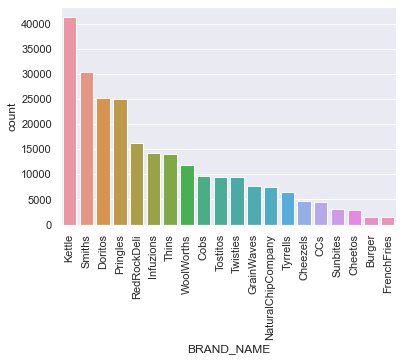

In [41]:
ax = sns.countplot(x=transactions['BRAND_NAME'], order=transactions['BRAND_NAME'].value_counts().index)
ax.tick_params(axis='x', rotation=90)

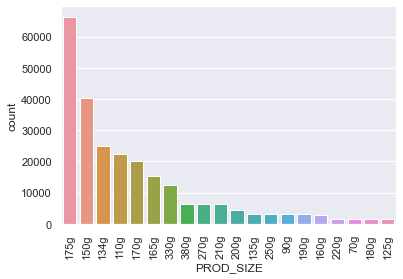

In [42]:
ax1 = sns.countplot(x=transactions['PROD_SIZE'],order=transactions['PROD_SIZE'].value_counts().index)
ax1.tick_params(axis='x', rotation=90)

In [43]:
#bring in customer data

# Observations

Preliminary observations of our transactions data show that we have more than 264835 transactions, Kettles is the most purchased brand and the 175g is the most purchased size by customers. Next we are going to bring in the customers data to find out who is buying what in the different customer segments.

In [47]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')

In [48]:
customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [49]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


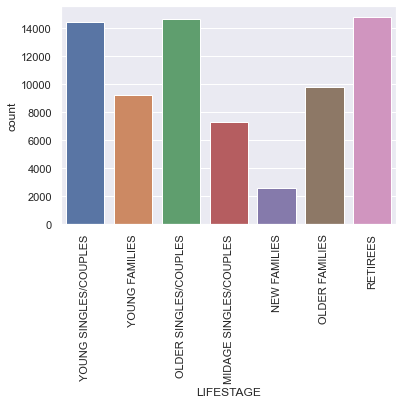

In [50]:
ax3 = sns.countplot(x=customer['LIFESTAGE'])
ax3.tick_params(axis='x', rotation=90)

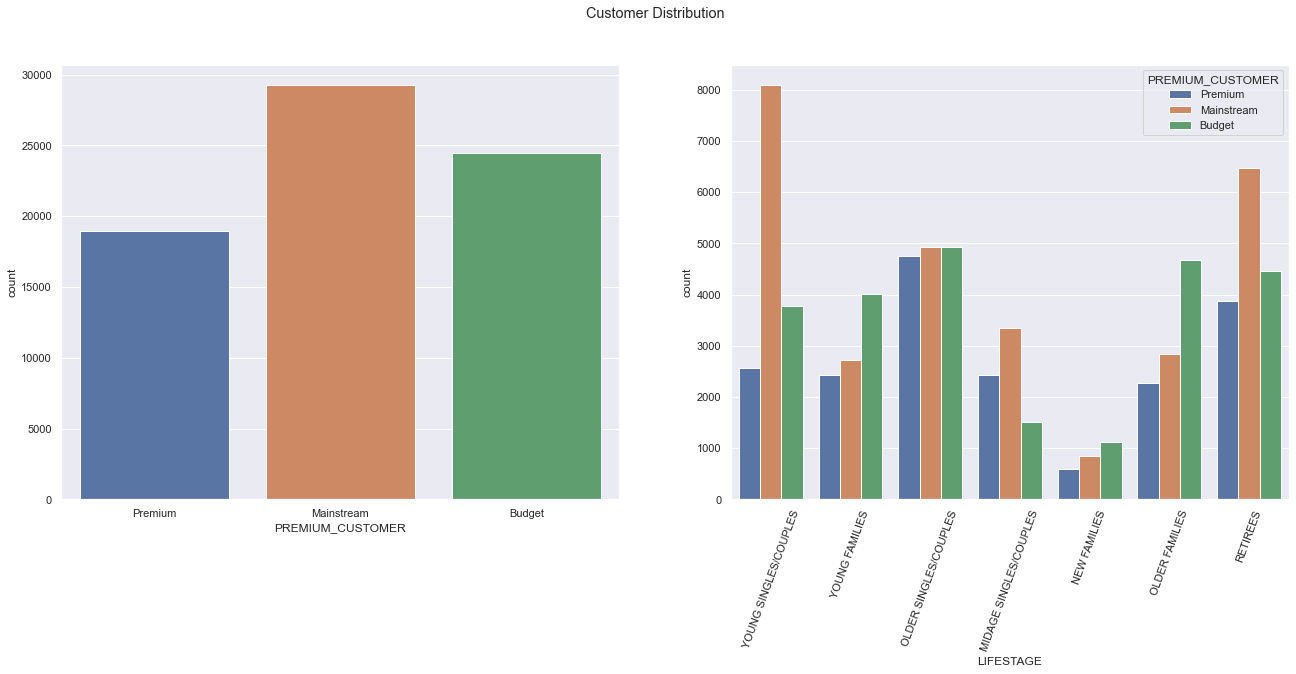

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Customer Distribution')
sns.countplot(ax=axes[0],x=customer['PREMIUM_CUSTOMER'])
sns.countplot(ax=axes[1],x=customer['LIFESTAGE'], hue= customer['PREMIUM_CUSTOMER'])
axes[1].tick_params(axis='x', rotation=70)

# Notes
LIFESTAGE: Customer attribute that identifies whether a customer has a family or not and what point in life they are at e.g. are their children in pre-school/primary/secondary school.

<br>PREMIUM_CUSTOMER: Customer segmentation used to differentiate shoppers by the price point of products they buy and the types of products they buy. It is used to identify whether customers may spend more for quality or brand or whether they will purchase the cheapest options.



# Observations

We have 72636 customers in our dataset. The Lifestage column shows the lifesatge of the customer and the premium column shows whether the Customer is in the mainstream, Budget or Premium Categories.

<br> The top 3 Customer categories are Retirees, Older Singles/Couples and Young Singles/Couples while in the premium customer category the highest customer group is the Mainstream customer category.


<br> Next we will merge the transactions and customer datasets into a new dataframe called new_df.

In [52]:
new_df  = transactions.merge(customer, on = "LYLTY_CARD_NBR", how = 'left')

In [53]:
new_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,month,PROD_NAME_NEW,BRAND_NAME,PROD_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,10,NaturalChipCompany SeaSalt 175g,NaturalChipCompany,175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,5,CCs Nacho Cheese175g,CCs,175g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,5,Smiths Crinkle CutChips Chicken 170g,Smiths,170g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,8,Smiths Chip ThinlyS/Cream&Onion 175g,Smiths,175g,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,8,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,150g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,3,Kettle Sweet Chilli And Sour Cream 175g,Kettle,175g,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,8,Tostitos Splash OfLime 175g,Tostitos,175g,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,11,Doritos Mexicana170g,Doritos,170g,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,12,Doritos Corn Chip Mexican Jalapeno 150g,Doritos,150g,YOUNG SINGLES/COUPLES,Premium


In [54]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  datetime64[ns]
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   month             246740 non-null  int64         
 9   PROD_NAME_NEW     246740 non-null  object        
 10  BRAND_NAME        246740 non-null  object        
 11  PROD_SIZE         246740 non-null  object        
 12  LIFESTAGE         246740 non-null  object        
 13  PREMIUM_CUSTOMER  246740 non-null  object        
dtypes: d

# Which Category is buying the most chips?

In [55]:
new_df['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES',
       'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES',
       'YOUNG FAMILIES'], dtype=object)

In [56]:
YOUNG_SC = new_df[new_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']
MIDAGE_SC = new_df[new_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES']
NEW_FAMILIES = new_df[new_df['LIFESTAGE'] == 'NEW FAMILIES']
OLDER_FAMILIES = new_df[new_df['LIFESTAGE'] == 'OLDER FAMILIES']
OLDER_SC = new_df[new_df['LIFESTAGE'] == 'OLDER SINGLES/COUPLES']
RETIREES = new_df[new_df['LIFESTAGE'] == 'RETIREES']
YOUNG_FAMILIES = new_df[new_df['LIFESTAGE'] == 'YOUNG FAMILIES']

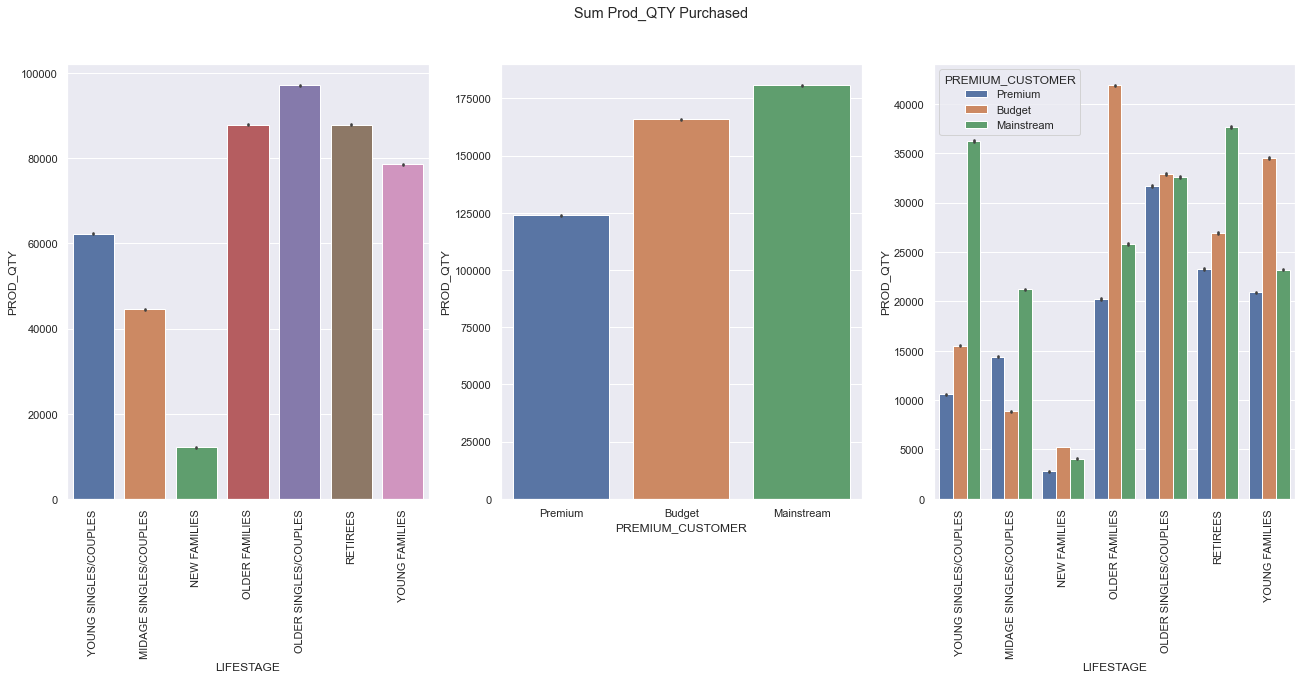

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Sum Prod_QTY Purchased')
sns.barplot(ax=axes[0],data=new_df, x = 'LIFESTAGE', y = 'PROD_QTY',estimator = sum)
sns.barplot(ax=axes[1],data=new_df, x = 'PREMIUM_CUSTOMER', y = 'PROD_QTY',estimator = sum)
sns.barplot(ax=axes[2],data=new_df, x = 'LIFESTAGE', y = 'PROD_QTY',hue = 'PREMIUM_CUSTOMER', estimator = sum)
axes[0].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

The top chips purchasing categories are older Singles/Couples, Older families, Retirees, young Families, Young Singles/Couples, Midage Singles/Couples and Lastly New Families. <br>In the Premium Customer Segment, the highest is Mainstream, Budget and Lastly premium. Generally across all categories, Budget customers tend to buy more within the lifestage categories. The highest sales is in the budget Older Families Category.

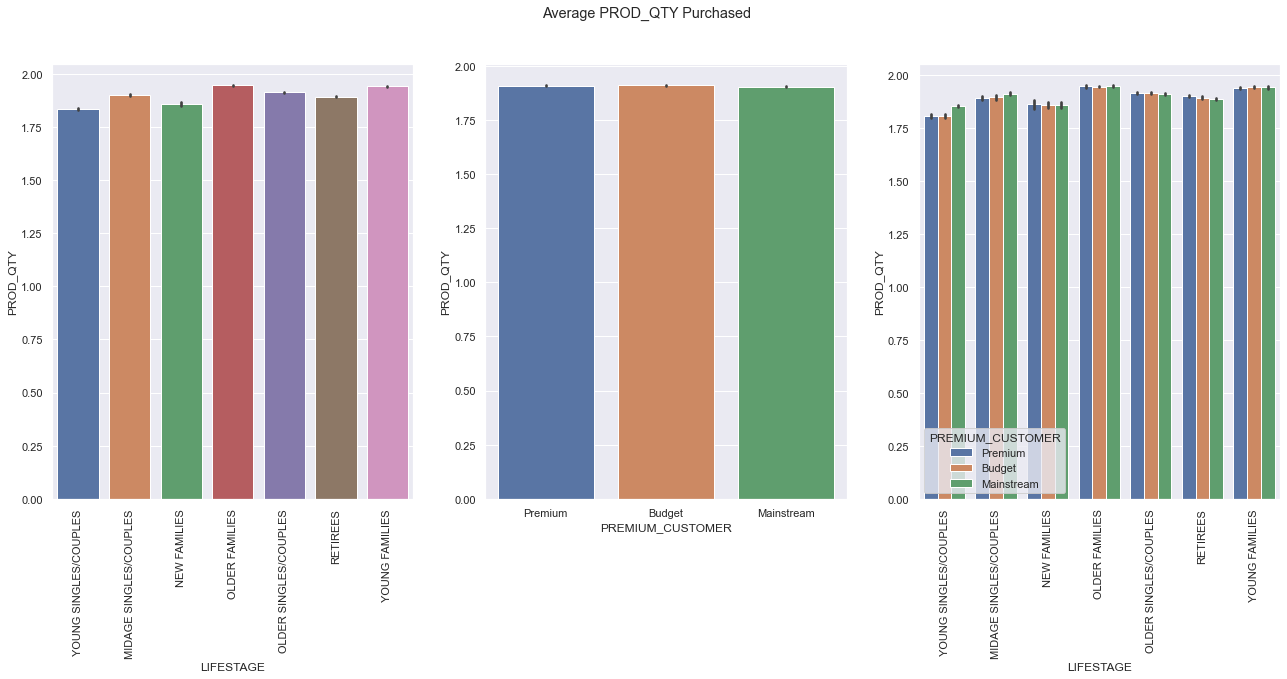

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Average PROD_QTY Purchased')
sns.barplot(ax=axes[0],data=new_df, x = 'LIFESTAGE', y = 'PROD_QTY')
sns.barplot(ax=axes[1],data=new_df, x = 'PREMIUM_CUSTOMER', y = 'PROD_QTY')
sns.barplot(ax=axes[2],data=new_df, x = 'LIFESTAGE', y = 'PROD_QTY',hue = 'PREMIUM_CUSTOMER')
axes[0].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

On average however, the top purchasing segments are the older families,Young families, Older Singles/couples, Midage singles/Couples, Retirees, New familes and lastly Young Singles/Couples. 

Within the Premium customer segment, there is not much difference in average quantity purchased.

In [61]:
groups = new_df.groupby('LIFESTAGE').agg('mean')
groups

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,month
LIFESTAGE,,,,,,,
MIDAGE SINGLES/COUPLES,135.547654,136119.432174,135781.983161,56.099026,1.901701,7.373442,6.512565
NEW FAMILIES,133.858858,134060.656765,133998.013237,56.371248,1.857781,7.287664,6.444821
OLDER FAMILIES,134.318880,134629.310643,134318.018468,56.456796,1.946410,7.274899,6.524979
OLDER SINGLES/COUPLES,134.005513,134673.725297,134082.336956,56.316343,1.913354,7.402982,6.565806
RETIREES,136.083306,136567.171954,136159.866684,56.151407,1.892593,7.373994,6.546725
YOUNG FAMILIES,135.888971,136268.525683,135969.586087,56.984294,1.940460,7.275841,6.499333
YOUNG SINGLES/COUPLES,135.058877,135586.527422,135137.473549,55.958550,1.834025,7.175854,6.561247


In [62]:
#By Categories

# Who spends the most on chips?

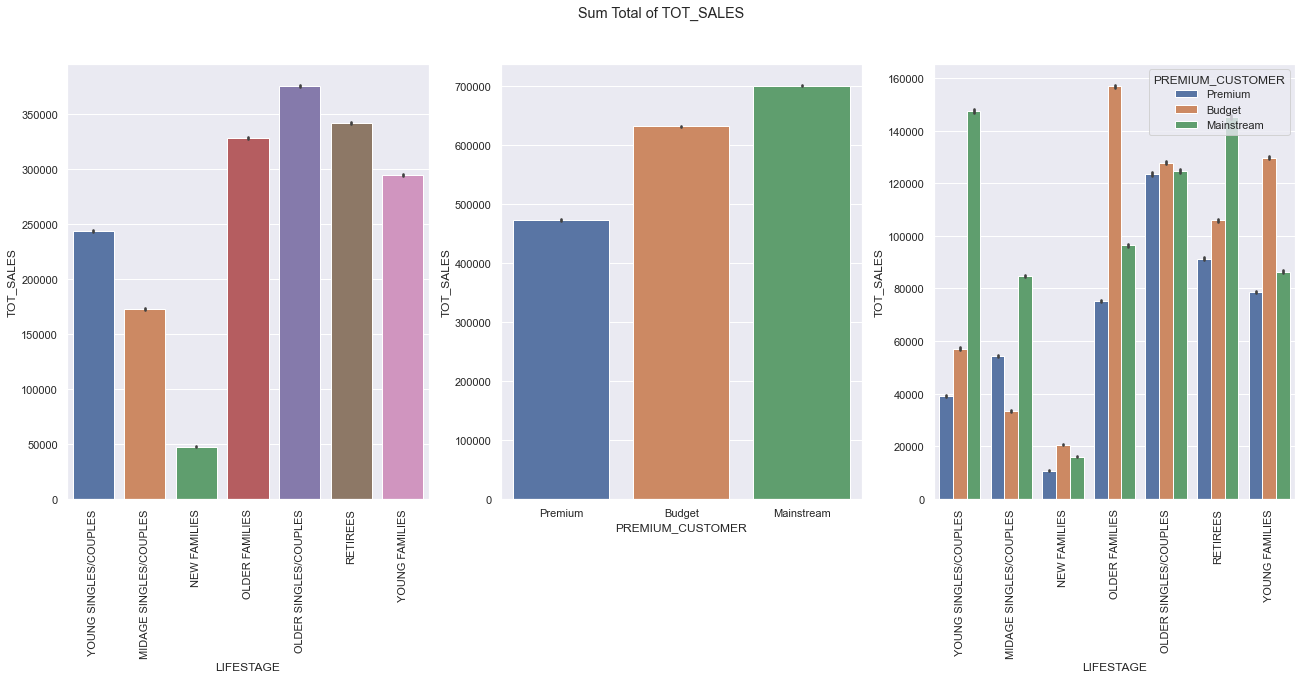

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Sum Total of TOT_SALES')
sns.barplot(ax=axes[0],data=new_df, x = 'LIFESTAGE', y = 'TOT_SALES',estimator = sum)
sns.barplot(ax=axes[1],data=new_df, x = 'PREMIUM_CUSTOMER', y = 'TOT_SALES',estimator = sum)
sns.barplot(ax=axes[2],data=new_df, x = 'LIFESTAGE', y = 'TOT_SALES',hue = 'PREMIUM_CUSTOMER', estimator = sum)
axes[0].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

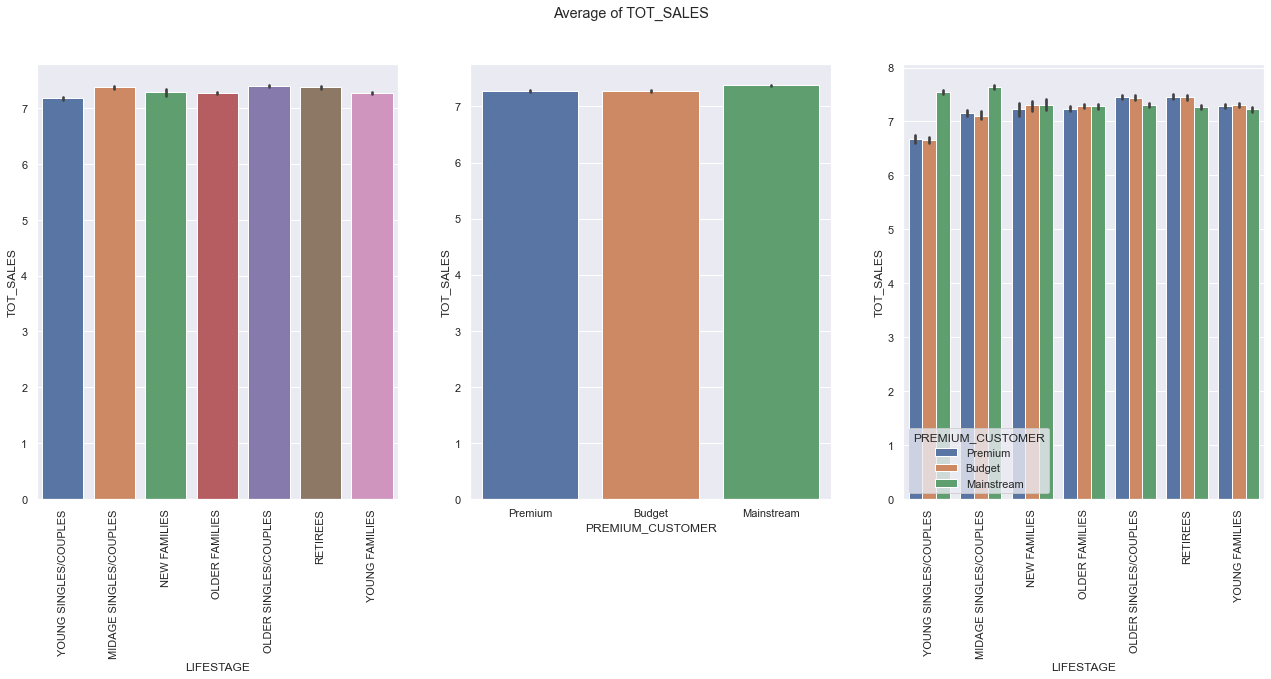

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(22, 8))
fig.suptitle('Average of TOT_SALES')
sns.barplot(ax=axes[0],data=new_df, x = 'LIFESTAGE', y = 'TOT_SALES')
sns.barplot(ax=axes[1],data=new_df, x = 'PREMIUM_CUSTOMER', y = 'TOT_SALES')
sns.barplot(ax=axes[2],data=new_df, x = 'LIFESTAGE', y = 'TOT_SALES',hue = 'PREMIUM_CUSTOMER')
axes[0].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)

# What are the most popular brands?

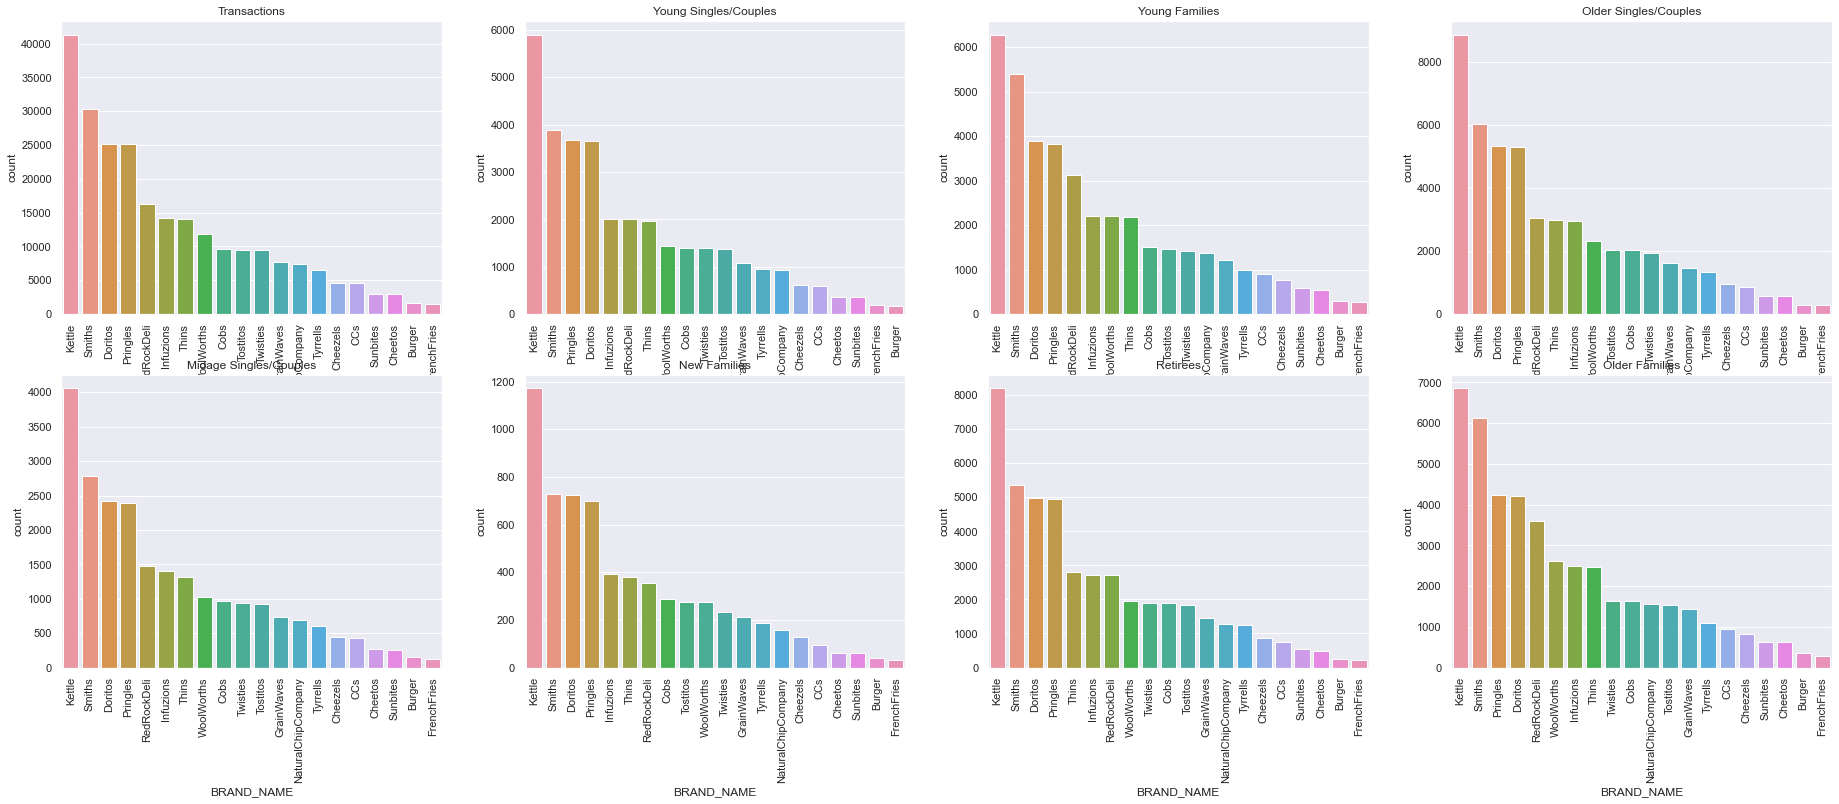

In [65]:
fig, axes = plt.subplots(2, 4, figsize=(26, 10))
sns.countplot(ax=axes[0,0],x=transactions['BRAND_NAME'],order=transactions['BRAND_NAME'].value_counts().index).set(title='Transactions')
sns.countplot(ax=axes[0,1],x=YOUNG_SC['BRAND_NAME'], order=YOUNG_SC['BRAND_NAME'].value_counts().index).set(title='Young Singles/Couples')
sns.countplot(ax=axes[0,2],x=YOUNG_FAMILIES['BRAND_NAME'], order=YOUNG_FAMILIES['BRAND_NAME'].value_counts().index).set(title='Young Families')
sns.countplot(ax=axes[0,3],x=OLDER_SC['BRAND_NAME'], order=OLDER_SC['BRAND_NAME'].value_counts().index).set(title='Older Singles/Couples')
sns.countplot(ax=axes[1,0],x=MIDAGE_SC['BRAND_NAME'], order=MIDAGE_SC['BRAND_NAME'].value_counts().index).set(title='Midage Singles/Couples')
sns.countplot(ax=axes[1,1],x=NEW_FAMILIES['BRAND_NAME'], order=NEW_FAMILIES['BRAND_NAME'].value_counts().index).set(title='New Families')
sns.countplot(ax=axes[1,2],x=RETIREES['BRAND_NAME'], order=RETIREES['BRAND_NAME'].value_counts().index).set(title='Retirees')
sns.countplot(ax=axes[1,3],x=OLDER_FAMILIES['BRAND_NAME'],order=OLDER_FAMILIES['BRAND_NAME'].value_counts().index).set(title='Older Families')
fig.tight_layout()
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

The top preferred brand across all categories is Kettles and then Smiths with Doritos in third place across the board except for Young Singles/Couples and Older Families who prefer Pringles over Doritos in third Place. The least preferred brands is French fries across the board although it comes second to the last for over burger for the young singles/Couples Category.

# What are the most purchased sizes?

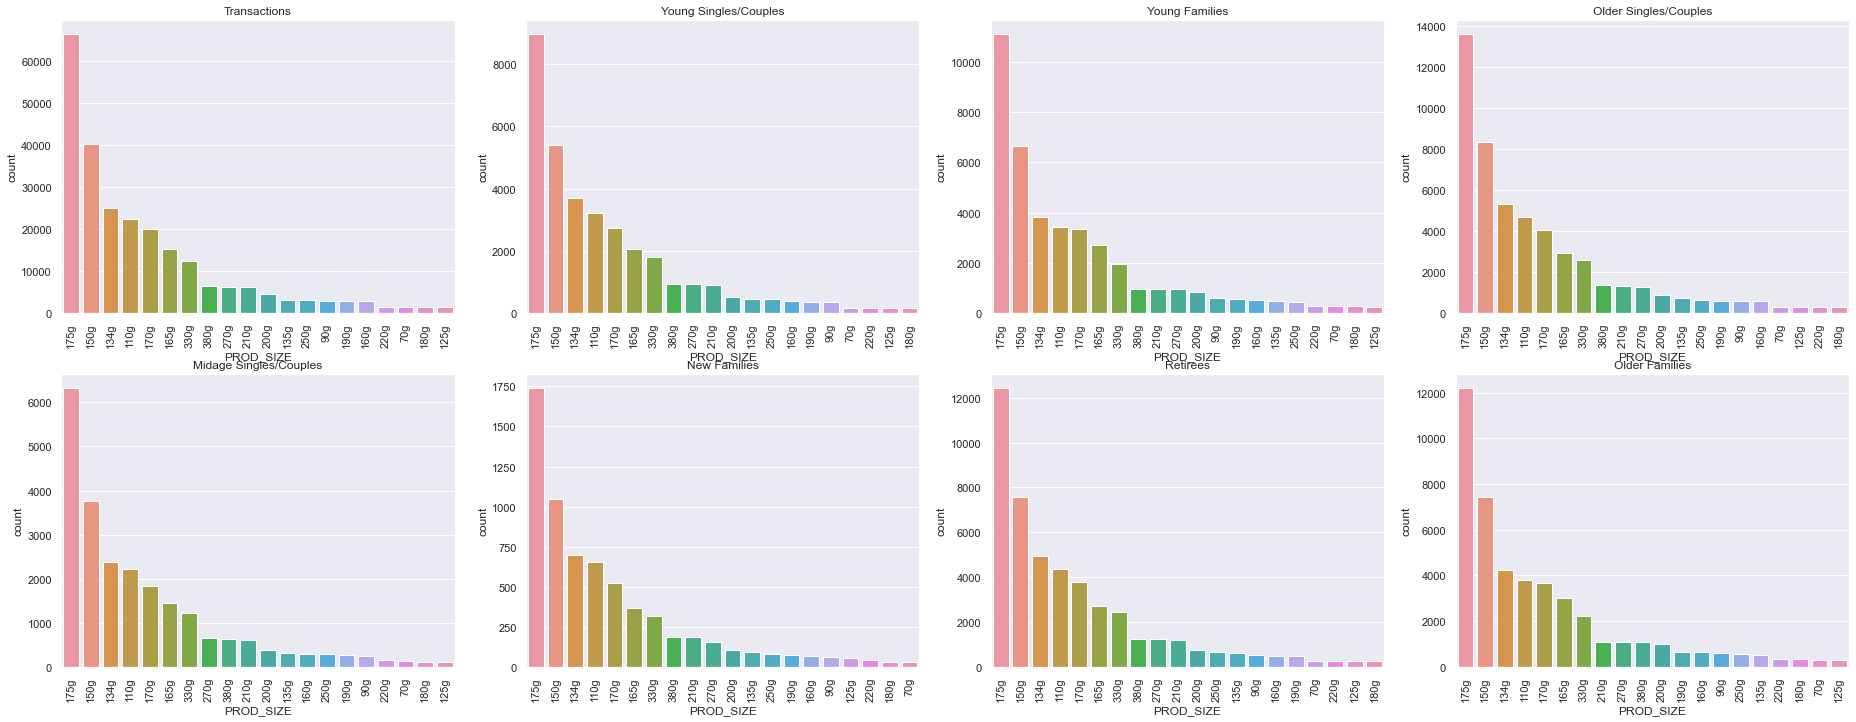

In [67]:
fig, axes = plt.subplots(2, 4, figsize=(26, 10))
#ax.tick_params(axis='x', rotation=90)
sns.countplot(ax=axes[0,0],data=transactions, x ='PROD_SIZE',order=transactions['PROD_SIZE'].value_counts().index).set(title='Transactions')
sns.countplot(ax=axes[0,1],data= YOUNG_SC,x = 'PROD_SIZE', order=YOUNG_SC['PROD_SIZE'].value_counts().index).set(title='Young Singles/Couples')
sns.countplot(ax=axes[0,2],data=YOUNG_FAMILIES,x='PROD_SIZE', order=YOUNG_FAMILIES['PROD_SIZE'].value_counts().index).set(title='Young Families')
sns.countplot(ax=axes[0,3],data=OLDER_SC, x='PROD_SIZE', order=OLDER_SC['PROD_SIZE'].value_counts().index).set(title='Older Singles/Couples')
sns.countplot(ax=axes[1,0],data=MIDAGE_SC,x ='PROD_SIZE', order=MIDAGE_SC['PROD_SIZE'].value_counts().index).set(title='Midage Singles/Couples')
sns.countplot(ax=axes[1,1],data=NEW_FAMILIES, x='PROD_SIZE', order=NEW_FAMILIES['PROD_SIZE'].value_counts().index).set(title='New Families')
sns.countplot(ax=axes[1,2],data= RETIREES,x = 'PROD_SIZE', order=RETIREES['PROD_SIZE'].value_counts().index).set(title='Retirees')
sns.countplot(ax=axes[1,3],data=OLDER_FAMILIES, x= 'PROD_SIZE',order=OLDER_FAMILIES['PROD_SIZE'].value_counts().index).set(title='Older Families')
fig.tight_layout()
#plt.xticks(rotation = 30)
#g.set_xticklabels(g.get_xticklabels(), rotation=30)
for ax in axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

The most purchased size across all customer groups is 175g, and then the 150g. Given that the 175g it is not the smallest nor the biggest size, and yet it is the most popular, it probably gives the most value for money, given its has the most popularity across all customer segments. The least purchased sizes are mostly 125g, the 180g and the 70g.

# Overall Customer Segments Observations

From the above analysis, we can make the following observations about our customer categories,
- Retirees: They are the highest group of customers in terms of count, the highest premium customer segment here is the Mainstream, In terms of total sales however, they rank Second in total and average and in terms of quantity of product bought, they rank Second in total and 5th on average.
- Older Singles Couples: They are the second largest customer segment and are the most equally distributed in terms of premium customer segment. They have the highest number of premium customers. They have the highest volume of transactions in total and on average. In terms of product quantity however, they rank the highest in total and third on average. This means that while they spend a lot more on average, they buy fewer product quantities on average which suggest they buy more expensive products. 
- Young Singles/Couples: They are the third largest customer category. They rank 5th in terms of total spent and least in terms of average spending. In terms of product quantity purchased, they rank 5th and also purchase the least on average. The biggest product subcategory here is the mainstream. Highest mainstream premium customer category.
- Older Families: They are the fourth largest customer category. They rank 3rd in terms of total spend and 5th in terms of average spend. In terms of product quantity purchased, they rank 3rd in terms of total quantity purchased and the highest in terms of number of products purchased, implying a tendency for exchanging higher value for money.
- Young Families: They are the next in terms of size. They rank 4th in total spent, 4th in average total spent and also 4th in totak quantity purchased but 2nd in average quantity purchased which also suggests a tendency for value for money. 
- MidAge Singles/Couples: The next in size, 6th in terms of total sales but rank 3rd in terms of average spent and 4th in average quantity which means that customers in this category spend a lot on average compared to the average customer and also shop with value in mind.
- New Families: They are smallest customer category. They spend the least amount of money both in total and on average. They buy the least in total and on average they are the last after Young Singles/Couples.